# Python API로 FRED 자료 사용하기

FRED는 Federal Reserve Economic Data의 약자로 세인트루이스 연방준비은행에서 운영하는 경제 통계 자료 데이터베이스이다. 384,000개가 넘는 경제 시계열 자료를 차트로 보거나 마이크로소프트 엑셀이나 텍스트 형태로 다운로드 받을 수 있다. 또한 사용자 계정 생성 후 API KEY를 받으면 Python, R 등의 프로그래밍 언어로 데이터를 받을 수 있는 API도 제공한다.

FRED의 홈페이지는 아래와 같다.

* https://research.stlouisfed.org/fred2/

<img src="https://datascienceschool.net/upfiles/e47c5c4455a447cfa229abdc64c53de0.png" width=100%>

## FRED 사용자 계정 생성

API Key를 받기 위해서는 우선 FRED 사용자 계정을 만들어야 한다. FRED 웹사이트 우측 상단의 "Register"를 눌러서 계정 생성 화면으로 들어간다.

<img src="https://datascienceschool.net/upfiles/7a6059f435cf43e79103a72e84795ff4.png" width=100%>

계정 신청과 이메일 확인을 마치면 FRED에 로그인(sign in)할 수 있다.

<img src="https://datascienceschool.net/upfiles/bf323d335166466ebdb1154f68130b71.png" width=100%>

메뉴 화면의 "API Keys"를 눌러서 API Key 생성 화면으로 들어간다.

<img src="https://datascienceschool.net/upfiles/b0f83c48ce7249558e9596f04db4a404.png" width=100%>

API 생성 화면에서 사용 목적을 간략히 서술하고 약관에 체크한 후 "Request API Key" 버튼을 누르면 API Key가 생성된다.

<img src="https://datascienceschool.net/upfiles/b436204887954ae6a594573d88173f36.png" width=100%>

생성된 API Key는 사용자 화면에서 항상 확인할 수 있다.

* https://research.stlouisfed.org/useraccount/apikeys/

<img src="https://datascienceschool.net/upfiles/662889385fe84d9ea37081c894400e17.png" width=100%>

## Python 패키지 설치

Python에서 FRED API를 사용하기 위한 파이썬 패키지는 다음과 같은 3가지가 있다.

* https://github.com/avelkoski/FRB
* https://github.com/mortada/fredapi
* https://github.com/zachwill/fred


여기에서는 가장 최근에 개발된 fredapi 패키지를 예로 들어 설명한다. 다른 패키지의 경우에는 해당 문서를 참조한다.

패키지 설치는 pip를 사용한다. 
```
pip install fredapi
```

datascienceschool/rpython 도커 이미지를 사용하는 경우에는 이미 설치되어 있으므로 별도로 설치할 필요가 없다.

Python 이외의 언어를 사용하는 경우에는 FRED 웹사이트의 API관련 정보를 참조한다.

* https://research.stlouisfed.org/docs/api/fred/

## fredapi 패키지 사용법

다음과 같이 fredapi 패키지에서 `Fred` 클래스를 import하여 자신이 가진 API Key 문자열 값을 api_key 인수에 넣고 인스턴스를 생성한다.

In [1]:
from fredapi import Fred
fred = Fred(api_key='insert api key here')

fred = Fred(api_key='6fd4e944a35573b44d7002609bd9efec')

`Fred` 클래스 인스턴스는 다음과 같은 메소드를 지원한다


* `get_series`
* `get_series_first_release`
* `get_series_latest_release`
* `get_series_all_releases`
* `get_series_as_of_date`
* `get_series_vintage_dates`
* `get_series_info`
* `search`
* `search_by_category`
* `search_by_release`

## FRED 자료 검색

FRED의 시계열 자료 각각은 `series`라고 한다. FRED에서 `series`자료는 탐색의 편의를 위해 Tag, Category, Release, Source 등의 기준으로 분류하고 있다.

예를 들어 GDP 즉, Gross Domestic Product는 

* GDP/GNP 카테고리(category id 106) 에 속하고

  * https://research.stlouisfed.org/fred2/categories/106
  
* Gross Domestic Product 릴리스 (release id 53) 에 속한다.

  * https://research.stlouisfed.org/fred2/release?rid=53

`FRED` 클래스는 series를 찾기 위해 다음 세가지 메소드를 제공한다.


* `search` 메소드는 모든 메타 정보에 대한 full text search를 통해 series를 찾는다.
* `search_by_category` 메소드와 `search_by_release` 메소드는 주어진 category 혹은 release id에 대한 series 목록을 출력한다.

검색 결과는 pandas DataFrame 형태로 제공된다.

In [19]:
fred.search("gdp", limit=5, order_by="popularity")

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
GDPC1,Quarterly,Q,GDPC1,2016-03-25 12:51:11,BEA Account Code: A191RX1 Real gross domestic...,2015-10-01,1947-01-01,96,2016-04-11,2016-04-11,Seasonally Adjusted Annual Rate,SAAR,Real Gross Domestic Product,Billions of Chained 2009 Dollars,Bil. of Chn. 2009 $
GDP,Quarterly,Q,GDP,2016-03-25 12:51:11,BEA Account Code: A191RC1 Gross domestic prod...,2015-10-01,1947-01-01,94,2016-04-11,2016-04-11,Seasonally Adjusted Annual Rate,SAAR,Gross Domestic Product,Billions of Dollars,Bil. of $
GFDEGDQ188S,Quarterly,Q,GFDEGDQ188S,2016-03-25 14:16:02,Federal Debt: Total Public Debt as Percent of ...,2015-10-01,1966-01-01,90,2016-04-11,2016-04-11,Seasonally Adjusted,SA,Federal Debt: Total Public Debt as Percent of ...,Percent of GDP,% of GDP
A191RL1Q225SBEA,Quarterly,Q,A191RL1Q225SBEA,2016-03-25 12:51:01,BEA Account Code: A191RL1 For more informatio...,2015-10-01,1947-04-01,90,2016-04-11,2016-04-11,Seasonally Adjusted Annual Rate,SAAR,Real Gross Domestic Product,Percent Change from Preceding Period,% Chg. from Preceding Period
M2V,Quarterly,Q,M2V,2016-03-25 13:36:02,Calculated as the ratio of quarterly nominal G...,2015-10-01,1959-01-01,88,2016-04-11,2016-04-11,Seasonally Adjusted,SA,Velocity of M2 Money Stock,Ratio,Ratio


In [18]:
fred.search_by_category(106, limit=5, order_by="popularity")

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
C191RL1A086NBEA,Annual,A,C191RL1A086NBEA,2016-02-26 19:06:49,BEA Account Code: C191RL1 For more informatio...,2015-01-01,1930-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Command-Basis Gross Domestic Product,Percent Change from Preceding Period,% Chg. from Preceding Period
CB22RL1A086NBEA,Annual,A,CB22RL1A086NBEA,2016-03-25 18:33:01,BEA Account Code: CB22RL1 For more informatio...,2015-01-01,1930-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Command-Basis Gross National Product,Percent Change from Preceding Period,% Chg. from Preceding Period
C191RX1A020NBEA,Annual,A,C191RX1A020NBEA,2016-03-25 18:33:03,BEA Account Code: C191RX1 For more informatio...,2015-01-01,1929-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Command-basis real gross domestic product,Billions of Chained 2009 Dollars,Bil. of Chn. 2009 $
C191RX1Q020SBEA,Quarterly,Q,C191RX1Q020SBEA,2016-03-25 13:58:21,BEA Account Code: C191RX1 For more informatio...,2015-10-01,1947-01-01,0,2016-04-11,2016-04-11,Seasonally Adjusted Annual Rate,SAAR,Command-basis real gross domestic product,Billions of Chained 2009 Dollars,Bil. of Chn. 2009 $
C362RX1A020NBEA,Annual,A,C362RX1A020NBEA,2016-03-25 18:33:01,BEA Account Code: C362RX1 For more informatio...,2015-01-01,1929-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Command-basis real net domestic product,Billions of Chained 2009 Dollars,Bil. of Chn. 2009 $


In [17]:
fred.search_by_release(53, limit=5, order_by="popularity")

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
K160271A027NBEA,Annual,A,K160271A027NBEA,2013-04-01 02:56:23,BEA Account Code: K160271 For more informatio...,2011-01-01,1951-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Accumulation of produced assets: Change in pri...,Billions of Dollars,Bil. of $
K160161A027NBEA,Annual,A,K160161A027NBEA,2013-04-01 04:41:38,BEA Account Code: K160161 For more informatio...,2011-01-01,1951-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Accumulation of produced assets: Stock reconci...,Billions of Dollars,Bil. of $
B140RG3A086NBEA,Annual,A,B140RG3A086NBEA,2016-03-25 18:32:41,BEA Account Code: B140RG3 For more informatio...,2015-01-01,1947-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Automobile output: Net purchases of used autos...,Index 2009=100,Index 2009=100
A138RG3A086NBEA,Annual,A,A138RG3A086NBEA,2013-08-09 18:41:17,BEA Account Code: A138RG3 For more informatio...,1966-01-01,1947-01-01,0,2016-04-11,2016-04-11,Not Seasonally Adjusted,NSA,Automobile output: Private fixed investment (c...,Index 2009=100,Index 2009=100
B139RG3Q086SBEA,Quarterly,Q,B139RG3Q086SBEA,2016-02-26 16:40:23,BEA Account Code: B139RG3 For more informatio...,2015-10-01,1947-01-01,0,2016-04-11,2016-04-11,Seasonally Adjusted,SA,Automobile output: Private fixed investment: N...,Index 2009=100,Index 2009=100


우리의 목표는 원하는 시계열 자료의 series id를 찾는 것이다. 만약 위의 방법으로 찾지 못했다면 직접 FRED 웹사이트에서 검색을 통해 series id를 찾아야 한다. 다음 그림은 검색을 통해 GDP series를 찾은 결과이다. 붉은색으로 표시한 부분이 sereis id 이다. series id는 URL의 마지막 부분으로 확인할 수도 있다. 다음 화면에 대한 URL은 다음과 같다.

* https://research.stlouisfed.org/fred2/series/GDP

<img src="https://www.datascienceschool.net/upfiles/b58120a94639459daaf17b808f428ec3.png" width=100%>

## FRED 자료 얻기

원하는 시계열 자료의 series id를 알고 있다면 `get_series` 메소드를 사용하여 시계열 자료를 얻을 수 있다. 자료는 pandas Series 형식으로 반환된다.

In [3]:
data = fred.get_series('GDP')

In [7]:
type(data)

pandas.core.series.Series

In [6]:
data.tail(20)

2011-01-01    15238.4
2011-04-01    15460.9
2011-07-01    15587.1
2011-10-01    15785.3
2012-01-01    15973.9
2012-04-01    16121.9
2012-07-01    16227.9
2012-10-01    16297.3
2013-01-01    16440.7
2013-04-01    16526.8
2013-07-01    16727.5
2013-10-01    16957.6
2014-01-01    16984.3
2014-04-01    17270.0
2014-07-01    17522.1
2014-10-01    17615.9
2015-01-01    17649.3
2015-04-01    17913.7
2015-07-01    18060.2
2015-10-01    18164.8
dtype: float64

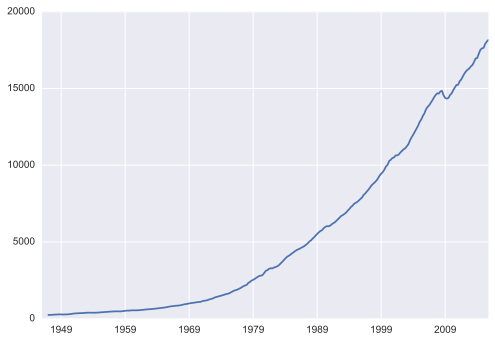

In [9]:
data.plot()